In [3]:
%load_ext rpy2.ipython

## Example Reference Code
from: [FlowingData: Mapping a century of earthquakes (sent by Fons-Rosen)](http://flowingdata.com/2014/04/15/mapping-a-century-of-earthquakes/)

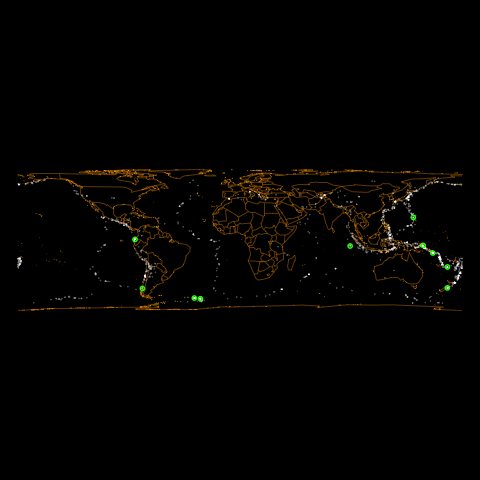

In [32]:
%%R
library(maps)
library(mapproj)

options(repr.plot.width = 4, repr.plot.height = 4)
 
# Load data
quakes <- read.csv('data/quakes2016.csv')
quakes_raw <- quakes

# Draw map
par(mar=c(0,0,0,0))
map("world", col="orange", bg="#000000", fill=FALSE, interior=TRUE, lwd=0.5, projection="cylequalarea", par=0, wrap=TRUE)
 
# Add points
ptsproj <- mapproject(quakes$longitude, quakes$latitude)
points(ptsproj, pch=20, cex=0.15, col="#ffffff40")
 
# Circle the highest magnitude quakes
quakes.o <- quakes[order(quakes$mag, decreasing=TRUE),]
majorpts <- mapproject(quakes.o$longitude[1:10], quakes.o$latitude[1:10])
symbols(majorpts, circles=rep(0.03, 10), add=TRUE, inches=FALSE, fg="green", lwd=2)

## Read Data for All Earthquakes

In [31]:
import pandas as pd

In [44]:
years = ['1985-1989', '1990-1994', '1995-1999', '2000', '2001', '2002', 
         '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', 
         '2011', '2012', '2013', '2014', '2015']

quakes = pd.DataFrame()
for year in years:
    path ='data/quakes%s.csv' % year
    frame = pd.read_csv(path)
    quakes = quakes.append(frame, ignore_index=True)
    
quakes.shape

(51870, 22)